In [1]:
x = [2.09, 2.10, 3.67, 5.66, 6.04, 6.43, 6.92, 7.65, 7.85, 7.97, 8.18, 8.60, 9.82]
y = [6.76, 7.5, 10.56, 14.35, 15.48, 15.96, 17.5, 18.78, 19.14, 19.23, 19.45, 20.74, 22.91]

n = len(x)

In [2]:
sum_xi    = 0
sum_xi2   = 0
sum_xi3   = 0
sum_xi4   = 0
sum_yi    = 0
sum_yixi  = 0
sum_yixi2 = 0

a0_lnr = 0
a1_lnr = 0
a0_prb = 0
a1_prb = 0
a2_prb = 0

for i in range(n):    
    sum_xi    += x[i]
    sum_xi2   += x[i]**2
    sum_xi3   += x[i]**3
    sum_xi4   += x[i]**4
    sum_yi    += y[i]
    sum_yixi  += y[i] * x[i] 
    sum_yixi2 += y[i] * x[i]**2

In [3]:
a0_lnr = ( n * sum_yixi - sum_xi * sum_yi ) / ( n * sum_xi2 - (sum_xi)**2 )

a1_lnr = ( sum_yi - a0_lnr * sum_xi ) / n

print(a0_lnr, a1_lnr)

2.0578138361354585 2.892508298267669


In [4]:
from sympy import *

S_x = Matrix([
        [ n,       sum_xi,  sum_xi2 ],
        [ sum_xi,  sum_xi2, sum_xi3 ],
        [ sum_xi2, sum_xi3, sum_xi4 ]
    ])

S_y = Matrix([
        [ sum_yi    ],
        [ sum_yixi  ],
        [ sum_yixi2 ]
    ])

A = S_x.inv() * S_y 

a0_prb = A[0]
a1_prb = A[1]
a2_prb = A[2]

pprint(A)

⎡ 2.60708574712635  ⎤
⎢                   ⎥
⎢ 2.18429243839046  ⎥
⎢                   ⎥
⎣-0.0112896553088611⎦


In [5]:
a0, a1, a2, xi = symbols("a_0 a_1 a_2 x_i")

y_lnr = []
y_prb = []

fy_lnr = a0 + a1 * xi
fy_prb = a0 + a1 * xi + a2 * xi**2

for i in range(n):
    y_lnr.append( fy_lnr.subs([ (a0, a0_lnr), (a1, a1_lnr), (xi, x[i]) ]).evalf() )
    y_prb.append( fy_prb.subs([ (a0, a0_prb), (a1, a1_prb), (a2, a2_prb), (xi, x[i]) ]).evalf() )

In [6]:
accuracy_lnr = 0
accuracy_prb = 0

for i in range(n):
    accuracy_lnr += (y[i] - y_lnr[i])**2
    accuracy_prb += (y[i] - y_prb[i])**2
    
accuracy_lnr = sqrt(accuracy_lnr / n)
accuracy_prb = sqrt(accuracy_prb / n)
    
print(format(accuracy_lnr, 'f'), format(accuracy_prb, 'f'))

4.90531131779079 0.220042331611417


РЕЗУЛЬТАТ

Прямая:

a0 = 2.0578138361354585, a1 = 2.892508298267669

СКП: 4.90531131779079

Парабола:

a0 = 2.60708574712635, a1 = 2.18429243839046, a2 = -0.0112896553088611

СКП: 0.220042331611417



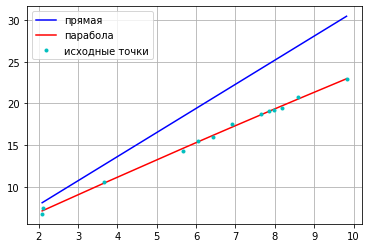

In [7]:
print("РЕЗУЛЬТАТ\n")
print("Прямая:\n")
print("a0 = %s, a1 = %s\n" % (a0_lnr, a1_lnr))
print("СКП: %s" % format(accuracy_lnr, 'f'))
print("")
print("Парабола:\n")
print("a0 = %s, a1 = %s, a2 = %s\n" % (a0_prb, a1_prb, a2_prb))
print("СКП: %s" % format(accuracy_prb, 'f'))
print("")

import matplotlib.pyplot as plt

plt.grid()

plt.plot(x, y_lnr, 'b',  label = 'прямая')
plt.plot(x, y_prb, 'r',  label = 'парабола')
plt.plot(x, y,     'c.', label = 'исходные точки')

plt.legend()
plt.savefig('6.png')